In [1]:
# Imports
import os
import sys
import glob

# Third-party imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Local imports
sys.path.append("/home/users/benhutch/skill-maps")
import dictionaries as dicts

# # Import functions from skill-maps
sys.path.append("/home/users/benhutch/skill-maps/python")
# import functions as fnc
import plotting_functions as plt_fnc

# Import functions from plot_init_benefit
sys.path.append("/home/users/benhutch/skill-maps/rose-suite-matching")
import plot_init_benefit as pib_fnc

In [3]:
# Set up the arguments
variable = "sfcWind"
region = "global"
season = "SON"
forecast_range = "2-9"
method = "raw"
no_bootstraps = 1000 # test case
bootstrap_base_dir = "/gws/nopw/j04/canari/users/benhutch/bootstrapping"

In [4]:
# Form the path
path = f"{bootstrap_base_dir}/{variable}/{region}/{season}/" + \
         f"{forecast_range}/{method}/no_bootstraps_{no_bootstraps}"

# Print the path
print(path)

# Check if the path exists
if os.path.exists(path):
    print("Path exists")

# print the files in the path
files = glob.glob(f"{path}/*")

# Print the files
print(files)


/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000
Path exists
['/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/corr1_p_sfcWind_global_SON_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/corr1_sfcWind_global_SON_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/nens1_sfcWind_global_SON_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/nens2_sfcWind_global_SON_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/obs_resid_sfcWind_global_SON_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/partial_r_p_sfcWind_global_SON_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootst

In [5]:
# test the function for extracting the values from the .txt files
values = pib_fnc.extract_values_from_txt(path, variable)

print(values)



['/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/nens1_sfcWind_global_SON_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/nens2_sfcWind_global_SON_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/sigo_resid_sfcWind_global_SON_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/sigo_sfcWind_global_SON_2-9.txt', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/start_end_years_sfcWind_global_SON_2-9.txt']
/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/nens1_sfcWind_global_SON_2-9.txt
/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/nens2_sfcWind_global_SON_2-9.txt
/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SO

In [6]:
# Test the function for extracting the arrays into a dictionary
arrays = pib_fnc.load_arrays_from_npy(path, variable)

print(arrays)


['/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/corr1_p_sfcWind_global_SON_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/corr1_sfcWind_global_SON_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/obs_resid_sfcWind_global_SON_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/partial_r_p_sfcWind_global_SON_2-9.npy', '/gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/partial_r_sfcWind_global_SON_2-9.npy']
corr1_file:  /gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/SON/2-9/raw/no_bootstraps_1000/corr1_sfcWind_global_SON_2-9.npy
{'corr1': array([[0.26974398, 0.26550386, 0.268489  , ..., 0.27329029, 0.2685671 ,
        0.28386102],
       [0.50519239, 0.52402671, 0.51855484, ..., 0.49991373, 0.50305292,
    

In [7]:
# Define a function to process the initialization benefit
# Set up the args first
# sigo = arrays["sigo"] ; sigo_resid = arrays["sigo_resid"]

# Extract the arrays
partial_r = arrays["partial_r"] ; corr1 = arrays["corr1"] 

# # Process the initialization benefit
# init_impact = pib_fnc.calculate_init_benefit(partial_r, sigo_resid,
#                                              corr1, sigo)

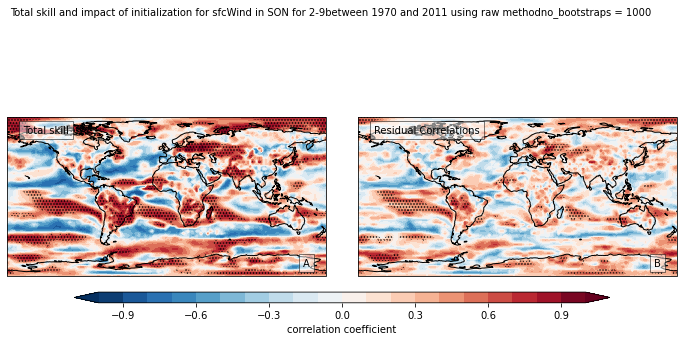

In [8]:
# Now we want to plot the initialization benefit alongside the raw field
# With significance levels shown by the stippling
# Extract the args
corr1_p = arrays["corr1_p"] ; partial_r_p = arrays["partial_r_p"]

# extract the values
nens1 = values["nens1"] ; nens2 = values["nens2"]
start_year = values["start_year"] ; end_year = values["end_year"]

# set up a plots directory
plots_dir = "/gws/nopw/j04/canari/users/benhutch/plots"

# If this directory doesn't exist, create it
if not os.path.exists(plots_dir):
    os.mkdir(plots_dir)

# run the function
plt_fnc.plot_raw_init_impact(corr1, corr1_p, partial_r, partial_r_p,
                             variable, season, forecast_range, method,
                             no_bootstraps, nens1, nens2, start_year,
                             end_year, plots_dir)